In [1]:
import sys
sys.path.append('../Codes/library/')
sys.path.append('../Codes/Python/')
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
import scipy.special as sc
import pandas as pd
from tqdm import tqdm
from functions import*
from functions import*
import warnings
warnings.filterwarnings('ignore')
N_A = 6.02214076e23
Text_files_path = '/Users/robertomorantovar/Dropbox/Research/Evolution_Immune_System/Text_files/'

%autosave 60

Autosaving every 60 seconds


['C' 'M' 'F' 'I' 'L' 'V' 'W' 'Y' 'A' 'G' 'T' 'S' 'Q' 'N' 'E' 'D' 'H' 'R'
 'K' 'P']


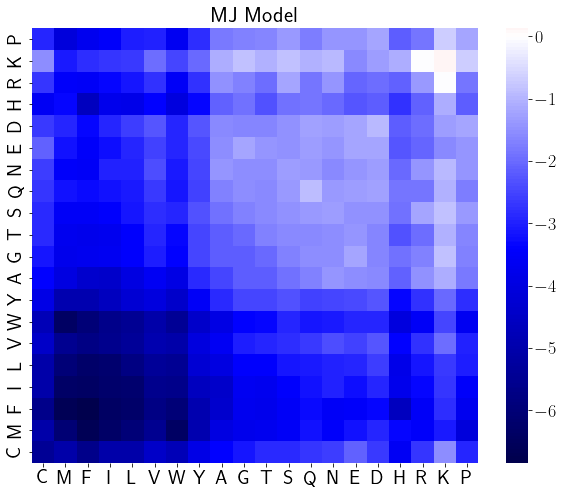

In [76]:
Matrix = 'BLOSUM62'
Matrix = 'MJ2'
# Matrix = 'TCRen'
# Matrix = 'gaussian'

fig, ax = plt.subplots(figsize=(10,8))


if((Matrix == 'MJ2')) or (Matrix == 'TCRen'):
    M2 = np.loadtxt(Text_files_path + Matrix + '.txt', skiprows= 1, usecols=range(1,21))
    M2_list = M2.tolist()
    Alphabet = np.loadtxt(Text_files_path + 'Alphabet.txt', dtype=bytes, delimiter='\t').astype(str)
    Alphabet_list = Alphabet.tolist()
    plot_energy_matrix(Energy_Matrix=M2_list, Alphabet=Alphabet, title=r'MJ Model', ax = ax)
    fig.savefig('../Figures/0_Shape_Space/MJ.png')

if(Matrix == 'BLOSUM62'):
    M2 = np.loadtxt(Text_files_path + Matrix + '.txt', skiprows= 1, usecols=range(1,25))
    M2_list = M2.tolist()
    Alphabet = np.array(['A', 'R'  ,'N' , 'D'  ,'C' , 'Q'  ,'E'  ,'G'  ,'H' , 'I'  ,'L'  ,'K'  ,'M' , 'F' , 'P' , 'S'  ,'T' , 'W' , 'Y' , 'V' , 'B' , 'Z'  ,'X',  '*'])
    Alphabet_list = Alphabet.tolist()
    plot_energy_matrix(Energy_Matrix=M2_list, Alphabet=Alphabet, title=r'BLOSUM62 Model', ax = ax)
    fig.savefig('../Figures/0_Shape_Space/' + Matrix + '.png')

if(Matrix == 'gaussian'):
    M2 = np.random.normal(loc = 0, scale = 1, size = (20, 20))
    M2_list = M2.tolist()
    Alphabet = np.loadtxt(Text_files_path + 'Alphabet.txt', dtype=bytes, delimiter='\t').astype(str)
    Alphabet_list = Alphabet.tolist()
    plot_energy_matrix(Energy_Matrix=M2_list, Alphabet=Alphabet, title=r'BLOSUM62 Model', ax = ax)
    fig.savefig('../Figures/0_Shape_Space/' + Matrix + '.png')
    
print(Alphabet)
w, v = LA.eig(M2_list)
L_alphabet = len(Alphabet)



## Genome files

In [77]:
L = 9
n = 100

## Random peptides

In [78]:
%%time 
energies_r = [] 
for ninemer in tqdm(np.arange(10000000)):
    contributions = np.array([M2[:,index] for index in np.random.randint(0, 20, L)])
    minE = 0
#     for i in np.arange(L):
#         minE += np.min(contributions[i, :])
    minE = np.sum(np.min(contributions, axis = 1))
#     print(minE, minE2)
    energies_r.append(minE)

100%|█████████████████████| 10000000/10000000 [04:00<00:00, 41625.53it/s]

CPU times: user 3min 59s, sys: 1.66 s, total: 4min 1s
Wall time: 4min


## Viruses

In [79]:
%%time
Influenza_A_data = open(Text_files_path + 'Antigenicity/Influenza_A.faa', 'r')
Influenza_A_data = Influenza_A_data.readlines()
Influenza_A_proteins = ''
for row in Influenza_A_data:
    if list(row)[0]!= '>' :
        Influenza_A_proteins = Influenza_A_proteins + row
Influenza_A_proteins = np.array(list(Influenza_A_proteins))
Influenza_A_proteins = Influenza_A_proteins[Influenza_A_proteins!='\n']

ninemers_Influenza_A = np.array([Influenza_A_proteins[i: i+L] for i in range(len(Influenza_A_proteins)-L)], dtype = object)
energies_Influenza_A = np.array([])
for ninemer in tqdm(ninemers_Influenza_A):
    contributions = np.array([M2[:,index] for index in [Alphabet_list.index(j) for j in ninemer]])
    minE = 0
#     for i in range(L):
    minE = np.sum(np.min(contributions[:,:], axis = 1))
    energies_Influenza_A = np.append(energies_Influenza_A, minE)
#------------------------------------------------------------------------------------------------------------
SARS_CoV_2_data = open(Text_files_path + 'Antigenicity/SARS-CoV-2.faa','r')
SARS_CoV_2_data = SARS_CoV_2_data.readlines()
SARS_CoV_2_proteins = ''
for row in SARS_CoV_2_data:
    if list(row)[0]!= '>' :
        SARS_CoV_2_proteins = SARS_CoV_2_proteins+row
SARS_CoV_2_proteins = np.array(list(SARS_CoV_2_proteins))
SARS_CoV_2_proteins = SARS_CoV_2_proteins[SARS_CoV_2_proteins!='\n']

ninemers_SARS_CoV_2 = np.array([SARS_CoV_2_proteins[i: i+L] for i in range(len(SARS_CoV_2_proteins)-L)], dtype = object)
energies_SARS_CoV_2 = np.array([])
for ninemer in tqdm(ninemers_SARS_CoV_2):
    contributions = np.array([M2[:,index] for index in [Alphabet_list.index(j) for j in ninemer]])
    minE = 0
#     for i in range(L):
    minE = np.sum(np.min(contributions[:,:], axis = 1))
    energies_SARS_CoV_2 = np.append(energies_SARS_CoV_2, minE)
#------------------------------------------------------------------------------------------------------------
HIV_data = open(Text_files_path + 'Antigenicity/HIV.faa','r')
HIV_data = HIV_data.readlines()
HIV_proteins = ''
for row in HIV_data:
    if list(row)[0]!= '>' :
        HIV_proteins = HIV_proteins+row
HIV_proteins = np.array(list(HIV_proteins))
HIV_proteins = HIV_proteins[HIV_proteins!='\n']

ninemers_HIV = np.array([HIV_proteins[i: i+L] for i in range(len(HIV_proteins)-L)], dtype = object)
energies_HIV = np.array([])

for ninemer in tqdm(ninemers_HIV):
    contributions = np.array([M2[:,index] for index in [Alphabet_list.index(j) for j in ninemer]])
    minE = 0
#     for i in range(L):
    minE = np.sum(np.min(contributions[:,:], axis = 1))
    energies_HIV = np.append(energies_HIV, minE)


100%|█████████████████████████████| 3749/3749 [00:00<00:00, 41347.26it/s]

CPU times: user 581 ms, sys: 8.06 ms, total: 589 ms
Wall time: 589 ms


## Human

In [80]:
Homo_data = open(Text_files_path + 'Antigenicity/Homo_sapiens.faa', 'r')
Homo_data = Homo_data.readlines()
Homo_proteins = ''
for row in Homo_data:
    if list(row)[0]!= '>' :
        Homo_proteins = Homo_proteins+row
Homo_proteins = np.array(list(Homo_proteins))
Homo_proteins = Homo_proteins[Homo_proteins!='\n']

ninemers_Homo = np.array([Homo_proteins[i: i+L] for i in range(len(Homo_proteins)-L)], dtype = object)
energies_Homo = np.array([])
for ninemer in tqdm(ninemers_Homo[np.random.choice(len(ninemers_Homo), n*len(ninemers_Influenza_A))]):
    if not(np.sum(np.isin(ninemer, ['U', 'X']))):
        contributions = np.array([M2[:,index] for index in [Alphabet_list.index(j) for j in ninemer]])
        minE = 0
#         for i in range(L):
        minE = np.sum(np.min(contributions[:,:], axis = 1))
        energies_Homo = np.append(energies_Homo, minE)


100%|██████████████████████████| 479800/479800 [00:50<00:00, 9538.36it/s]


## Mus

In [81]:
%%time
Mus_data = open(Text_files_path + 'Antigenicity/Mus_musculus.faa', 'r')
Mus_data = Mus_data.readlines()
Mus_proteins = ''
for row in Mus_data:
    if list(row)[0]!= '>' :
        Mus_proteins = Mus_proteins+row
Mus_proteins = np.array(list(Mus_proteins))
Mus_proteins = Mus_proteins[Mus_proteins!='\n']

ninemers_Mus = np.array([Mus_proteins[i: i+L] for i in range(len(Mus_proteins)-L)], dtype = object)
energies_Mus = np.array([])
for ninemer in tqdm(ninemers_Mus[np.random.choice(len(ninemers_Mus), n*len(ninemers_Influenza_A))]):
    if not(np.sum(np.isin(ninemer, ['U', 'X']))):
        contributions = np.array([M2[:,index] for index in [Alphabet_list.index(j) for j in ninemer]])
        minE = 0
#         for i in range(L):
        minE = np.sum(np.min(contributions[:,:], axis = 1))
        energies_Mus = np.append(energies_Mus, minE)


100%|██████████████████████████| 479800/479800 [00:50<00:00, 9561.17it/s]

CPU times: user 1min 42s, sys: 15.5 s, total: 1min 58s
Wall time: 2min 7s


## Candida

In [82]:
%%time
Candida_data = open(Text_files_path + 'Antigenicity/Candida_albicans.faa','r')
Candida_data = Candida_data.readlines()
Candida_proteins = ''
for row in Candida_data:
    if list(row)[0]!= '>' :
        Candida_proteins = Candida_proteins+row
Candida_proteins = np.array(list(Candida_proteins))
Candida_proteins = Candida_proteins[Candida_proteins!='\n']

ninemers_Candida = np.array([Candida_proteins[i: i+L] for i in range(len(Candida_proteins)-L)], dtype = object)
energies_Candida = np.array([])

for ninemer in tqdm(ninemers_Candida[np.random.choice(len(ninemers_Candida), n*len(ninemers_Influenza_A))]):
    if not(np.sum(np.isin(ninemer, ['U', 'X', 'J', 'B', 'Z']))):
        contributions = np.array([M2[:,index] for index in [Alphabet_list.index(j) for j in ninemer]])
        minE = 0
#         for i in range(L):
        minE = np.sum(np.min(contributions[:,:], axis = 1))
        energies_Candida = np.append(energies_Candida, minE)
        

100%|██████████████████████████| 479800/479800 [00:54<00:00, 8845.50it/s]

CPU times: user 56.4 s, sys: 601 ms, total: 57 s
Wall time: 57.1 s


## Plasmodium

In [83]:
%%time
Malaria_data = open(Text_files_path + 'Antigenicity/Plasmodium_falciparum.faa','r')
Malaria_data = Malaria_data.readlines()
Malaria_proteins = ''
for row in Malaria_data:
    if list(row)[0]!= '>' :
        Malaria_proteins = Malaria_proteins+row
Malaria_proteins = np.array(list(Malaria_proteins))
Malaria_proteins = Malaria_proteins[Malaria_proteins!='\n']

ninemers_Malaria = np.array([Malaria_proteins[i: i+L] for i in range(len(Malaria_proteins)-L)], dtype = object)
energies_Malaria = np.array([])

for ninemer in tqdm(ninemers_Malaria[np.random.choice(len(ninemers_Malaria), n*len(ninemers_Influenza_A))]):
    if not(np.sum(np.isin(ninemer, ['U', 'X']))):
        contributions = np.array([M2[:,index] for index in [Alphabet_list.index(j) for j in ninemer]])
        minE = 0
#         for i in range(L):
        minE = np.sum(np.min(contributions[:,:], axis = 1))
        energies_Malaria = np.append(energies_Malaria, minE)
        

100%|██████████████████████████| 479800/479800 [00:49<00:00, 9605.53it/s]

CPU times: user 53 s, sys: 619 ms, total: 53.6 s
Wall time: 53.7 s


## Bacteria

In [84]:
%%time
Ecoli_data = open(Text_files_path + 'Antigenicity/E_coli.faa','r')
Ecoli_data = Ecoli_data.readlines()
Ecoli_proteins = ''
for row in Ecoli_data:
    if list(row)[0]!= '>' :
        Ecoli_proteins = Ecoli_proteins+row
Ecoli_proteins = np.array(list(Ecoli_proteins))
Ecoli_proteins = Ecoli_proteins[Ecoli_proteins!='\n']

ninemers_Ecoli = np.array([Ecoli_proteins[i: i+L] for i in range(len(Ecoli_proteins)-L)], dtype = object)
energies_Ecoli = np.array([])

for ninemer in tqdm(ninemers_Ecoli[np.random.choice(len(ninemers_Ecoli), n*len(ninemers_Influenza_A))]):
    if not(np.sum(np.isin(ninemer, ['U', 'X']))):
        contributions = np.array([M2[:,index] for index in [Alphabet_list.index(j) for j in ninemer]])
        minE = 0
#         for i in range(L):
        minE = np.sum(np.min(contributions[:,:], axis = 1))
        energies_Ecoli = np.append(energies_Ecoli, minE)
#------------------------------------------------------------------------------------------------------------
Ealbertii_data = open(Text_files_path + 'Antigenicity/Escherichia_albertii.faa','r')
Ealbertii_data = Ealbertii_data.readlines()
Ealbertii_proteins = ''
for row in Ealbertii_data:
    if list(row)[0]!= '>' :
        Ealbertii_proteins = Ealbertii_proteins+row
Ealbertii_proteins = np.array(list(Ealbertii_proteins))
Ealbertii_proteins = Ealbertii_proteins[Ealbertii_proteins!='\n']

ninemers_Ealbertii = np.array([Ealbertii_proteins[i: i+L] for i in range(len(Ealbertii_proteins)-L)], dtype = object)
energies_Ealbertii = np.array([])

for ninemer in tqdm(ninemers_Ealbertii[np.random.choice(len(ninemers_Ealbertii), n*len(ninemers_Influenza_A))]):
    if not(np.sum(np.isin(ninemer, ['U', 'X']))):
        contributions = np.array([M2[:,index] for index in [Alphabet_list.index(j) for j in ninemer]])
        minE = 0
#         for i in range(L):
        minE = np.sum(np.min(contributions[:,:], axis = 1))
        energies_Ealbertii = np.append(energies_Ealbertii, minE)
#------------------------------------------------------------------------------------------------------------        
Vharveyi_data = open(Text_files_path + 'Antigenicity/Vibrio_harveyi.faa','r')
Vharveyi_data = Vharveyi_data.readlines()
Vharveyi_proteins = ''
for row in Vharveyi_data:
    if list(row)[0]!= '>' :
        Vharveyi_proteins = Vharveyi_proteins+row
Vharveyi_proteins = np.array(list(Vharveyi_proteins))
Vharveyi_proteins = Vharveyi_proteins[Vharveyi_proteins!='\n']

ninemers_Vharveyi = np.array([Vharveyi_proteins[i: i+L] for i in range(len(Vharveyi_proteins)-L)], dtype = object)
energies_Vharveyi = np.array([])
for ninemer in tqdm(ninemers_Vharveyi[np.random.choice(len(ninemers_Vharveyi), n*len(ninemers_Influenza_A))]):
    if not(np.sum(np.isin(ninemer, ['U', 'X']))):
        contributions = np.array([M2[:,index] for index in [Alphabet_list.index(j) for j in ninemer]])
        minE = 0
#         for i in range(L):
        minE = np.sum(np.min(contributions[:,:], axis = 1))
        energies_Vharveyi = np.append(energies_Vharveyi, minE)
        

100%|██████████████████████████| 479800/479800 [00:49<00:00, 9638.43it/s]

CPU times: user 2min 32s, sys: 1.07 s, total: 2min 33s
Wall time: 2min 33s


In [85]:
print('Homo:', len(Homo_proteins))
print('Mus:', len(Mus_proteins))
print('Candida:', len(Candida_proteins))
print('Malaria:', len(Malaria_proteins))
print('Ecoli:', len(Ecoli_proteins))
print('Ealbertii:', len(Ealbertii_proteins))
print('Vharveyi:', len(Vharveyi_proteins))
print('Influenza:', len(Influenza_A_proteins))
print('SARS-CoV-2:', len(SARS_CoV_2_proteins))
print('HIV:', len(HIV_proteins))


Homo: 90213603
Mus: 64410305
Candida: 2979179
Malaria: 4102337
Ecoli: 1329980
Ealbertii: 1337309
Vharveyi: 1665309
Influenza: 4807
SARS-CoV-2: 14149
HIV: 3758


## Plots

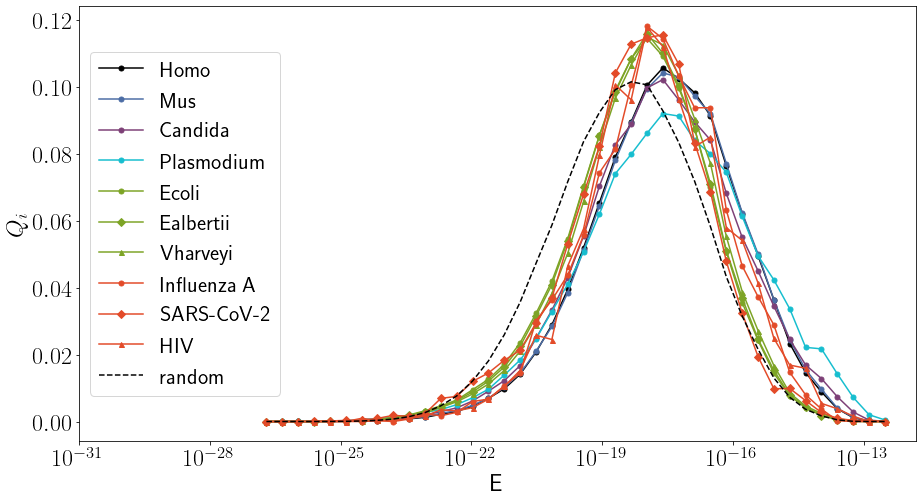

In [100]:
fig, ax = plt.subplots(figsize=(15,8))
n_bins = 40
data = ax.hist([energies_Homo, energies_Mus, energies_Candida, energies_Malaria, energies_Ecoli, energies_Ealbertii, energies_Vharveyi, energies_Influenza_A, energies_SARS_CoV_2, energies_HIV,  energies_r], bins = n_bins, density = True,  alpha = 0, cumulative = False)
fig.show(False)
plt.close()

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(np.exp(data[1][:-1]), (data[0][0]), linestyle = '-', marker = 'o', label = 'Homo', color = 'black', ms = 5)
ax.plot(np.exp(data[1][:-1]), (data[0][1]), linestyle = '-', marker = 'o', label = 'Mus', color = my_blue, ms = 5,)
ax.plot(np.exp(data[1][:-1]), (data[0][2]), linestyle = '-', marker = 'o', label = 'Candida', color = my_purple, ms = 5)
ax.plot(np.exp(data[1][:-1]), (data[0][3]), linestyle = '-', marker = 'o', label = 'Plasmodium', color = my_cyan, ms = 5)
ax.plot(np.exp(data[1][:-1]), (data[0][4]), linestyle = '-', marker = 'o', label = 'Ecoli', color = my_green, ms = 5)
ax.plot(np.exp(data[1][:-1]), (data[0][5]), linestyle = '-', marker = 'D', label = 'Ealbertii', color = my_green, ms = 5)
ax.plot(np.exp(data[1][:-1]), (data[0][6]), linestyle = '-', marker = '^', label = 'Vharveyi', color = my_green, ms = 5)
ax.plot(np.exp(data[1][:-1]), (data[0][7]), linestyle = '-', marker = 'o', label = 'Influenza A', color = my_red, ms = 5)
ax.plot(np.exp(data[1][:-1]), (data[0][8]), linestyle = '-', marker = 'D', label = 'SARS-CoV-2', color = my_red, ms = 5)
ax.plot(np.exp(data[1][:-1]), (data[0][9]), linestyle = '-', marker = '^', label = 'HIV', color = my_red, ms = 5)
ax.plot(np.exp(data[1][:-1]), (data[0][-1]), linestyle = '--', marker = '', label = 'random', color = 'black', ms = 5)
ax.legend(fontsize = 22, loc = 6);
my_plot_layout(ax=ax, ylabel = r'$Q_i$', xlabel = r'E', xscale = 'log', yscale = 'linear')
#ax.set_ylim(top = 1.5)
ax.set_xlim(left = 1e-31)
fig.savefig('../Figures/8_Antigenicity/first_signature-%d-'%L+Matrix+'.pdf')


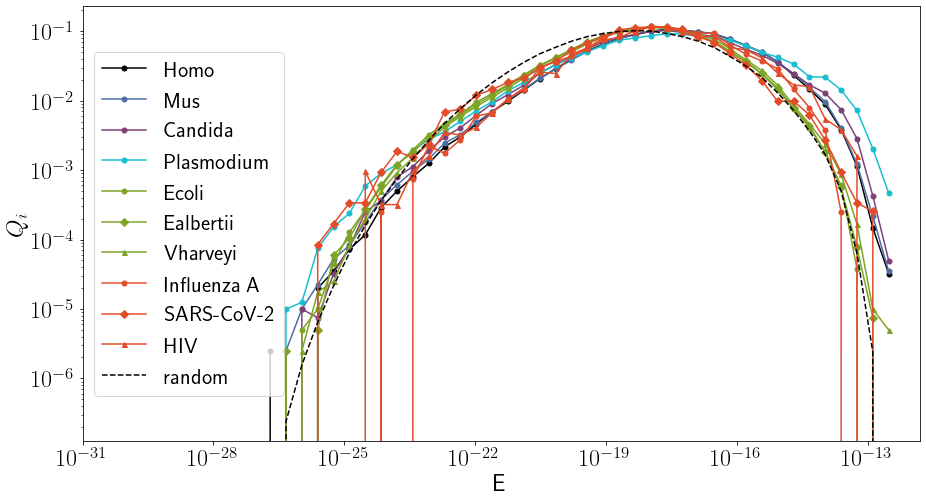

In [98]:
fig, ax = plt.subplots(figsize=(15,8))
n_bins = 40
data = ax.hist([energies_Homo, energies_Mus, energies_Candida, energies_Malaria, energies_Ecoli, energies_Ealbertii, energies_Vharveyi, energies_Influenza_A, energies_SARS_CoV_2, energies_HIV,  energies_r], bins = n_bins, density = True,  alpha = 0, cumulative = False)
fig.show(False)
plt.close()

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(np.exp(data[1][:-1]), (data[0][0]), linestyle = '-', marker = 'o', label = 'Homo', color = 'black', ms = 5)
ax.plot(np.exp(data[1][:-1]), (data[0][1]), linestyle = '-', marker = 'o', label = 'Mus', color = my_blue, ms = 5,)
ax.plot(np.exp(data[1][:-1]), (data[0][2]), linestyle = '-', marker = 'o', label = 'Candida', color = my_purple, ms = 5)
ax.plot(np.exp(data[1][:-1]), (data[0][3]), linestyle = '-', marker = 'o', label = 'Plasmodium', color = my_cyan, ms = 5)
ax.plot(np.exp(data[1][:-1]), (data[0][4]), linestyle = '-', marker = 'o', label = 'Ecoli', color = my_green, ms = 5)
ax.plot(np.exp(data[1][:-1]), (data[0][5]), linestyle = '-', marker = 'D', label = 'Ealbertii', color = my_green, ms = 5)
ax.plot(np.exp(data[1][:-1]), (data[0][6]), linestyle = '-', marker = '^', label = 'Vharveyi', color = my_green, ms = 5)
ax.plot(np.exp(data[1][:-1]), (data[0][7]), linestyle = '-', marker = 'o', label = 'Influenza A', color = my_red, ms = 5)
ax.plot(np.exp(data[1][:-1]), (data[0][8]), linestyle = '-', marker = 'D', label = 'SARS-CoV-2', color = my_red, ms = 5)
ax.plot(np.exp(data[1][:-1]), (data[0][9]), linestyle = '-', marker = '^', label = 'HIV', color = my_red, ms = 5)
ax.plot(np.exp(data[1][:-1]), (data[0][-1]), linestyle = '--', marker = '', label = 'random', color = 'black', ms = 5)
ax.legend(fontsize = 22, loc = 6);
my_plot_layout(ax=ax, ylabel = r'$Q_i$', xlabel = r'E', xscale = 'log', yscale = 'log')
#ax.set_ylim(top = 1.5)
ax.set_xlim(left = 1e-31)
fig.savefig('../Figures/8_Antigenicity/first_signature0-%d-'%L+Matrix+'.pdf')


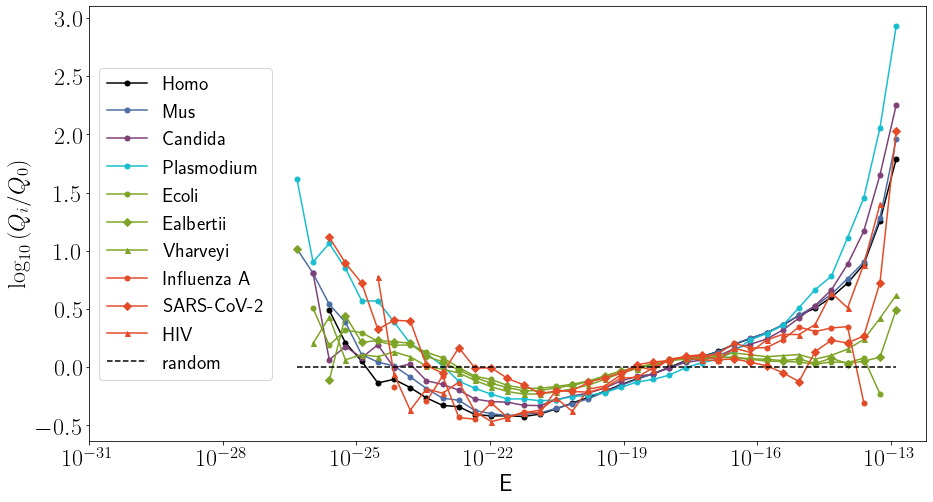

In [97]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(np.exp(data[1][:-1]), np.log10(data[0][0]/data[0][-1]), linestyle = '-', marker = 'o', label = 'Homo', color = 'black', ms = 5)
ax.plot(np.exp(data[1][:-1]), np.log10(data[0][1]/data[0][-1]), linestyle = '-', marker = 'o', label = 'Mus', color = my_blue, ms = 5)
ax.plot(np.exp(data[1][:-1]), np.log10(data[0][2]/data[0][-1]), linestyle = '-', marker = 'o', label = 'Candida', color = my_purple, ms = 5)
ax.plot(np.exp(data[1][:-1]), np.log10(data[0][3]/data[0][-1]), linestyle = '-', marker = 'o', label = 'Plasmodium', color = my_cyan, ms = 5)
ax.plot(np.exp(data[1][:-1]), np.log10(data[0][4]/data[0][-1]), linestyle = '-', marker = 'o', label = 'Ecoli', color = my_green, ms = 5)
ax.plot(np.exp(data[1][:-1]), np.log10(data[0][5]/data[0][-1]), linestyle = '-', marker = 'D', label = 'Ealbertii', color = my_green, ms = 5)
ax.plot(np.exp(data[1][:-1]), np.log10(data[0][6]/data[0][-1]), linestyle = '-', marker = '^', label = 'Vharveyi', color = my_green, ms = 5)
ax.plot(np.exp(data[1][:-1]), np.log10(data[0][7]/data[0][-1]), linestyle = '-', marker = 'o', label = 'Influenza A', color = my_red, ms = 5)
ax.plot(np.exp(data[1][:-1]), np.log10(data[0][8]/data[0][-1]), linestyle = '-', marker = 'D', label = 'SARS-CoV-2', color = my_red, ms = 5)
ax.plot(np.exp(data[1][:-1]), np.log10(data[0][9]/data[0][-1]), linestyle = '-', marker = '^', label = 'HIV', color = my_red, ms = 5)
ax.plot(np.exp(data[1][:-1]), np.log10(data[0][-1]/data[0][-1]), linestyle = '--', marker = '', label = 'random', color = 'black', ms = 3)
ax.legend(fontsize = 20, loc = 6);
my_plot_layout(ax=ax, ylabel = r'$\log_{10}{(Q_i/Q_0)}$', xlabel = r'E', xscale = 'log')
#ax.set_ylim(-2, 5)
ax.set_xlim(left = 1e-31)
fig.savefig('../Figures/8_Antigenicity/first_signature1-%d-'%L+Matrix+'.pdf')


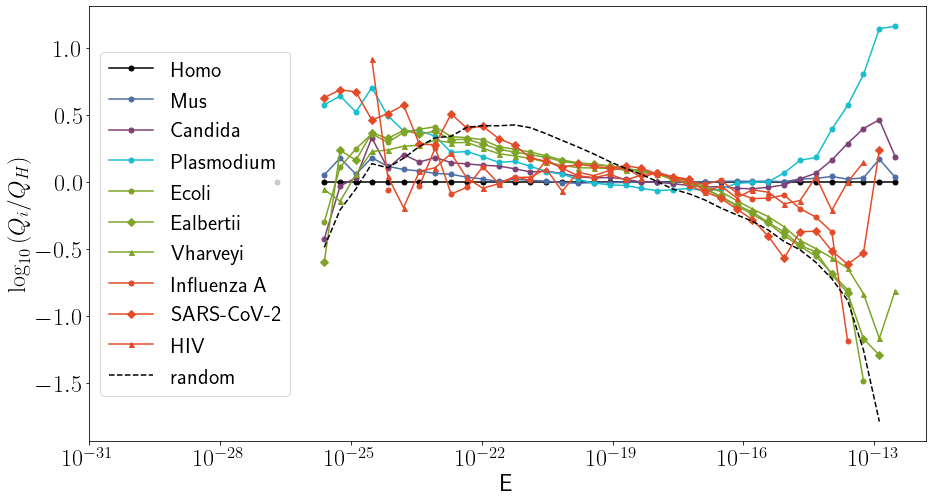

In [96]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(np.exp(data[1][:-1]), np.log10(data[0][0]/data[0][0]), linestyle = '-', marker = 'o', label = 'Homo', color = 'black', ms = 5)
ax.plot(np.exp(data[1][:-1]), np.log10(data[0][1]/data[0][0]), linestyle = '-', marker = 'o', label = 'Mus', color = my_blue, ms = 5)
ax.plot(np.exp(data[1][:-1]), np.log10(data[0][2]/data[0][0]), linestyle = '-', marker = 'o', label = 'Candida', color = my_purple, ms = 5)
ax.plot(np.exp(data[1][:-1]), np.log10(data[0][3]/data[0][0]), linestyle = '-', marker = 'o', label = 'Plasmodium', color = my_cyan, ms = 5)
ax.plot(np.exp(data[1][:-1]), np.log10(data[0][4]/data[0][0]), linestyle = '-', marker = 'o', label = 'Ecoli', color = my_green, ms = 5)
ax.plot(np.exp(data[1][:-1]), np.log10(data[0][5]/data[0][0]), linestyle = '-', marker = 'D', label = 'Ealbertii', color = my_green, ms = 5)
ax.plot(np.exp(data[1][:-1]), np.log10(data[0][6]/data[0][0]), linestyle = '-', marker = '^', label = 'Vharveyi', color = my_green, ms = 5)
ax.plot(np.exp(data[1][:-1]), np.log10(data[0][7]/data[0][0]), linestyle = '-', marker = 'o', label = 'Influenza A', color = my_red, ms = 5)
ax.plot(np.exp(data[1][:-1]), np.log10(data[0][8]/data[0][0]), linestyle = '-', marker = 'D', label = 'SARS-CoV-2', color = my_red, ms = 5)
ax.plot(np.exp(data[1][:-1]), np.log10(data[0][9]/data[0][0]), linestyle = '-', marker = '^', label = 'HIV', color = my_red, ms = 5)
ax.plot(np.exp(data[1][:-1]), np.log10(data[0][-1]/data[0][0]), linestyle = '--', marker = '', label = 'random', color = 'black', ms = 5)
ax.legend(fontsize = 22, loc = 6);
my_plot_layout(ax=ax, ylabel = r'$\log_{10}{(Q_i/Q_H)}$', xlabel = r'E', yscale = 'linear', xscale = 'log')
#ax.set_ylim(-3, 3)
ax.set_xlim(left = 1e-31)
fig.savefig('../Figures/8_Antigenicity/first_signature2-%d-'%L+Matrix+'.pdf')


# L = 15

In [31]:
%%time
L=15
ninemers_Ecoli = np.array([Ecoli_proteins[i: i+L] for i in range(len(Ecoli_proteins)-L)], dtype = object)
energies_Ecoli = np.array([])

ninemers_Malaria = np.array([Malaria_proteins[i: i+L] for i in range(len(Malaria_proteins)-L)], dtype = object)
energies_Malaria = np.array([])

ninemers_Mus = np.array([Mus_proteins[i: i+L] for i in range(len(Mus_proteins)-L)], dtype = object)
energies_Mus = np.array([])

ninemers_Homo = np.array([Homo_proteins[i: i+L] for i in range(len(Homo_proteins)-L)], dtype = object)
energies_Homo = np.array([])

for ninemer in ninemers_Malaria[np.random.choice(len(ninemers_Malaria), 10*len(ninemers_Influenza_A))]:
    if not(np.sum(np.isin(ninemer, ['U', 'X']))):
        contributions = np.array([M2[index,:] for index in [Alphabet_list.index(j) for j in ninemer]])
        minE = 0
        for i in range(L):
            minE += np.min(contributions[i,:])
        energies_Malaria = np.append(energies_Malaria, minE)
        
for ninemer in ninemers_Ecoli[np.random.choice(len(ninemers_Ecoli), 10*len(ninemers_Influenza_A))]:
    if not(np.sum(np.isin(ninemer, ['U', 'X']))):
        contributions = np.array([M2[index,:] for index in [Alphabet_list.index(j) for j in ninemer]])
        minE = 0
        for i in range(L):
            minE += np.min(contributions[i,:])
        energies_Ecoli = np.append(energies_Ecoli, minE)
        
for ninemer in ninemers_Mus[np.random.choice(len(ninemers_Mus), 10*len(ninemers_Influenza_A))]:
    if not(np.sum(np.isin(ninemer, ['U', 'X']))):
        contributions = np.array([M2[index,:] for index in [Alphabet_list.index(j) for j in ninemer]])
        minE = 0
        for i in range(L):
            minE += np.min(contributions[i,:])
        energies_Mus = np.append(energies_Mus, minE)
        
for ninemer in ninemers_Homo[np.random.choice(len(ninemers_Homo), 10*len(ninemers_Influenza_A))]:
    if not(np.sum(np.isin(ninemer, ['U', 'X']))):
        contributions = np.array([M2[index,:] for index in [Alphabet_list.index(j) for j in ninemer]])
        minE = 0
        for i in range(L):
            minE += np.min(contributions[i,:])
        energies_Homo = np.append(energies_Homo, minE)

CPU times: user 2min 13s, sys: 33.7 s, total: 2min 47s
Wall time: 3min 23s


In [32]:
%%time
ninemers_Influenza_A = np.array([Influenza_A_proteins[i: i+L] for i in range(len(Influenza_A_proteins)-L)], dtype = object)
energies_Influenza_A = np.array([])
ninemers_SARS_CoV_2 = np.array([SARS_CoV_2_proteins[i: i+L] for i in range(len(SARS_CoV_2_proteins)-L)], dtype = object)
energies_SARS_CoV_2 = np.array([])
ninemers_HIV = np.array([HIV_proteins[i: i+L] for i in range(len(HIV_proteins)-L)], dtype = object)
energies_HIV = np.array([])

for ninemer in ninemers_Influenza_A:
    contributions = np.array([M2[index,:] for index in [Alphabet_list.index(j) for j in ninemer]])
    minE = 0
    for i in range(L):
        minE += np.min(contributions[i,:])
    energies_Influenza_A = np.append(energies_Influenza_A, minE)

for ninemer in ninemers_SARS_CoV_2:
    contributions = np.array([M2[index,:] for index in [Alphabet_list.index(j) for j in ninemer]])
    minE = 0
    for i in range(L):
        minE += np.min(contributions[i,:])
    energies_SARS_CoV_2 = np.append(energies_SARS_CoV_2, minE)
    
for ninemer in ninemers_HIV:#[np.random.choice(len(ninemers_HIV), len(ninemers_Influenza_A))]:
    contributions = np.array([M2[index,:] for index in [Alphabet_list.index(j) for j in ninemer]])
    minE = 0
    for i in range(L):
        minE += np.min(contributions[i,:])
    energies_HIV = np.append(energies_HIV, minE)


CPU times: user 1.64 s, sys: 10.6 ms, total: 1.65 s
Wall time: 1.66 s


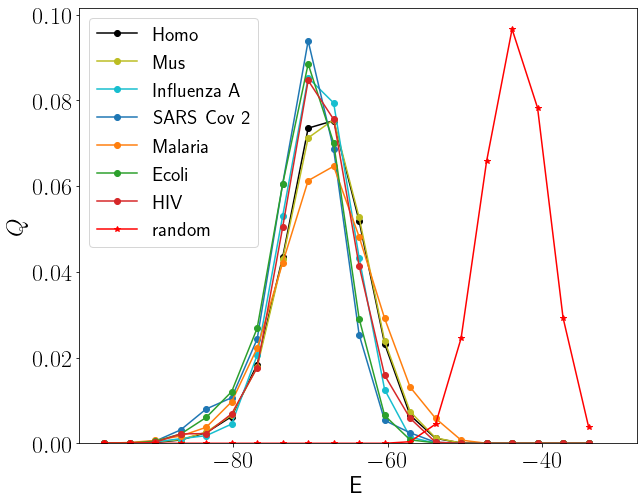

In [33]:
fig, ax = plt.subplots(figsize=(10,8))
data = ax.hist([energies_Homo, energies_Mus, energies_Influenza_A, energies_SARS_CoV_2,  energies_Malaria, energies_Ecoli, energies_HIV,  energies_r], bins = 20, density = True,  alpha = 0)
ax.plot((data[1][:-1]), data[0][0], linestyle = '-', marker = 'o', label = 'Homo', color = 'black')
ax.plot((data[1][:-1]), data[0][1], linestyle = '-', marker = 'o', label = 'Mus')
ax.plot((data[1][:-1]), data[0][2], linestyle = '-', marker = 'o', label = 'Influenza A')
ax.plot((data[1][:-1]), data[0][3], linestyle = '-', marker = 'o', label = 'SARS Cov 2')
ax.plot((data[1][:-1]), data[0][4], linestyle = '-', marker = 'o', label = 'Malaria')
ax.plot((data[1][:-1]), data[0][5], linestyle = '-', marker = 'o', label = 'Ecoli')
ax.plot((data[1][:-1]), data[0][6], linestyle = '-', marker = 'o', label = 'HIV')
ax.plot((data[1][:-1]), data[0][-1], linestyle = '-', marker = '*', label = 'random', color = 'red')
ax.legend(fontsize = 20);
my_plot_layout(ax=ax, ylabel = r'$Q$', xlabel = r'E')
fig.savefig('../Figures/8_Antigenicity/first_signature1_20.pdf')


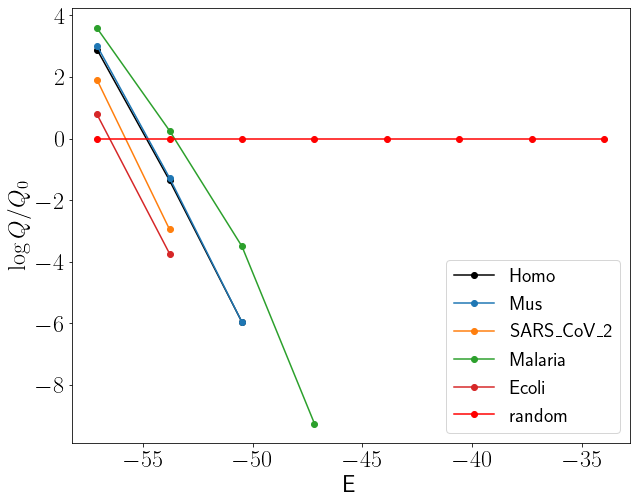

In [34]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot((data[1][:-1]), np.log(data[0][0]/data[0][-1]), linestyle = '-', marker = 'o', label = 'Homo', color = 'black')
ax.plot((data[1][:-1]), np.log(data[0][1]/data[0][-1]), linestyle = '-', marker = 'o', label = 'Mus')
#ax.plot((data[1][:-1]), np.log(data[0][2]/data[0][-1]), linestyle = '-', marker = 'o', label = 'Influenza A')
ax.plot((data[1][:-1]), np.log(data[0][3]/data[0][-1]), linestyle = '-', marker = 'o', label = 'SARS_CoV_2')
ax.plot((data[1][:-1]), np.log(data[0][4]/data[0][-1]), linestyle = '-', marker = 'o', label = 'Malaria')
ax.plot((data[1][:-1]), np.log(data[0][5]/data[0][-1]), linestyle = '-', marker = 'o', label = 'Ecoli')
#ax.plot((data[1][:-1]), np.log(data[0][6]/data[0][-1]), linestyle = '-', marker = 'o', label = 'HIV')
ax.plot((data[1][:-1]), np.log(data[0][-1]/data[0][-1]), linestyle = '-', marker = 'o', label = 'random', color = 'red')
ax.legend(fontsize = 20);
my_plot_layout(ax=ax, ylabel = r'$\log{Q/Q_0}$', xlabel = r'E')
fig.savefig('../Figures/8_Antigenicity/first_signature2_20.pdf')


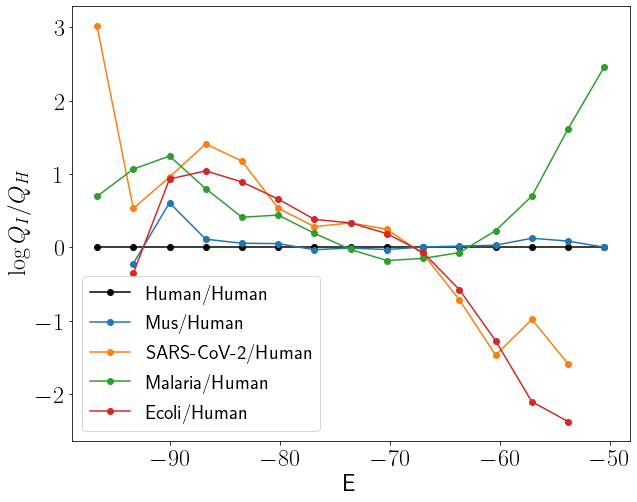

In [35]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot((data[1][:-1]), np.log(data[0][0]/data[0][0]), linestyle = '-', marker = 'o', label = 'Human/Human',color='black')
ax.plot((data[1][:-1]), np.log(data[0][1]/data[0][0]), linestyle = '-', marker = 'o', label = 'Mus/Human')
#ax.plot((data[1][:-1]), np.log(data[0][2]/data[0][0]), linestyle = '-', marker = 'o', label = 'Influenza A/Human')
ax.plot((data[1][:-1]), np.log(data[0][3]/data[0][0]), linestyle = '-', marker = 'o', label = 'SARS-CoV-2/Human')
ax.plot((data[1][:-1]), np.log(data[0][4]/data[0][0]), linestyle = '-', marker = 'o', label = 'Malaria/Human')
ax.plot((data[1][:-1]), np.log(data[0][5]/data[0][0]), linestyle = '-', marker = 'o', label = 'Ecoli/Human')
#ax.plot((data[1][:-1]), np.log(data[0][6]/data[0][0]), linestyle = '-', marker = 'o', label = 'HIV/Human')
ax.legend(fontsize = 20);
my_plot_layout(ax=ax, ylabel = r'$\log{Q_I/Q_H}$', xlabel = r'E')
fig.savefig('../Figures/8_Antigenicity/first_signature3_20.pdf')


# L = 5

In [36]:
%%time
L=5
ninemers_Ecoli = np.array([Ecoli_proteins[i: i+L] for i in range(len(Ecoli_proteins)-L)], dtype = object)
energies_Ecoli = np.array([])

ninemers_Malaria = np.array([Malaria_proteins[i: i+L] for i in range(len(Malaria_proteins)-L)], dtype = object)
energies_Malaria = np.array([])

ninemers_Mus = np.array([Mus_proteins[i: i+L] for i in range(len(Mus_proteins)-L)], dtype = object)
energies_Mus = np.array([])

ninemers_Homo = np.array([Homo_proteins[i: i+L] for i in range(len(Homo_proteins)-L)], dtype = object)
energies_Homo = np.array([])

for ninemer in ninemers_Malaria[np.random.choice(len(ninemers_Malaria), 10*len(ninemers_Influenza_A))]:
    if not(np.sum(np.isin(ninemer, ['U', 'X']))):
        contributions = np.array([M2[index,:] for index in [Alphabet_list.index(j) for j in ninemer]])
        minE = 0
        for i in range(L):
            minE += np.min(contributions[i,:])
        energies_Malaria = np.append(energies_Malaria, minE)
        
for ninemer in ninemers_Ecoli[np.random.choice(len(ninemers_Ecoli), 10*len(ninemers_Influenza_A))]:
    if not(np.sum(np.isin(ninemer, ['U', 'X']))):
        contributions = np.array([M2[index,:] for index in [Alphabet_list.index(j) for j in ninemer]])
        minE = 0
        for i in range(L):
            minE += np.min(contributions[i,:])
        energies_Ecoli = np.append(energies_Ecoli, minE)
        
for ninemer in ninemers_Mus[np.random.choice(len(ninemers_Mus), 10*len(ninemers_Influenza_A))]:
    if not(np.sum(np.isin(ninemer, ['U', 'X']))):
        contributions = np.array([M2[index,:] for index in [Alphabet_list.index(j) for j in ninemer]])
        minE = 0
        for i in range(L):
            minE += np.min(contributions[i,:])
        energies_Mus = np.append(energies_Mus, minE)
        
for ninemer in ninemers_Homo[np.random.choice(len(ninemers_Homo), 10*len(ninemers_Influenza_A))]:
    if not(np.sum(np.isin(ninemer, ['U', 'X']))):
        contributions = np.array([M2[index,:] for index in [Alphabet_list.index(j) for j in ninemer]])
        minE = 0
        for i in range(L):
            minE += np.min(contributions[i,:])
        energies_Homo = np.append(energies_Homo, minE)

CPU times: user 1min 44s, sys: 33.4 s, total: 2min 17s
Wall time: 2min 47s


In [37]:
%%time
ninemers_Influenza_A = np.array([Influenza_A_proteins[i: i+L] for i in range(len(Influenza_A_proteins)-L)], dtype = object)
energies_Influenza_A = np.array([])
ninemers_SARS_CoV_2 = np.array([SARS_CoV_2_proteins[i: i+L] for i in range(len(SARS_CoV_2_proteins)-L)], dtype = object)
energies_SARS_CoV_2 = np.array([])
ninemers_HIV = np.array([HIV_proteins[i: i+L] for i in range(len(HIV_proteins)-L)], dtype = object)
energies_HIV = np.array([])

for ninemer in ninemers_Influenza_A:
    contributions = np.array([M2[index,:] for index in [Alphabet_list.index(j) for j in ninemer]])
    minE = 0
    for i in range(L):
        minE += np.min(contributions[i,:])
    energies_Influenza_A = np.append(energies_Influenza_A, minE)

for ninemer in ninemers_SARS_CoV_2:
    contributions = np.array([M2[index,:] for index in [Alphabet_list.index(j) for j in ninemer]])
    minE = 0
    for i in range(L):
        minE += np.min(contributions[i,:])
    energies_SARS_CoV_2 = np.append(energies_SARS_CoV_2, minE)
    
for ninemer in ninemers_HIV:#[np.random.choice(len(ninemers_HIV), len(ninemers_Influenza_A))]:
    contributions = np.array([M2[index,:] for index in [Alphabet_list.index(j) for j in ninemer]])
    minE = 0
    for i in range(L):
        minE += np.min(contributions[i,:])
    energies_HIV = np.append(energies_HIV, minE)


CPU times: user 693 ms, sys: 6.77 ms, total: 700 ms
Wall time: 697 ms


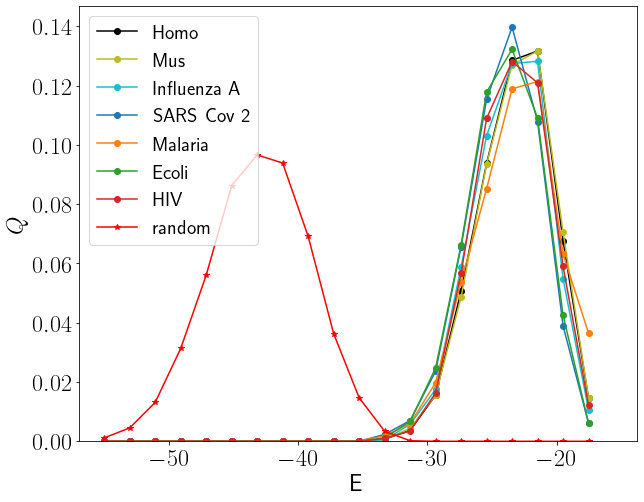

In [38]:
fig, ax = plt.subplots(figsize=(10,8))
data = ax.hist([energies_Homo, energies_Mus, energies_Influenza_A, energies_SARS_CoV_2,  energies_Malaria, energies_Ecoli, energies_HIV,  energies_r], bins = 20, density = True,  alpha = 0)
ax.plot((data[1][:-1]), data[0][0], linestyle = '-', marker = 'o', label = 'Homo', color = 'black')
ax.plot((data[1][:-1]), data[0][1], linestyle = '-', marker = 'o', label = 'Mus')
ax.plot((data[1][:-1]), data[0][2], linestyle = '-', marker = 'o', label = 'Influenza A')
ax.plot((data[1][:-1]), data[0][3], linestyle = '-', marker = 'o', label = 'SARS Cov 2')
ax.plot((data[1][:-1]), data[0][4], linestyle = '-', marker = 'o', label = 'Malaria')
ax.plot((data[1][:-1]), data[0][5], linestyle = '-', marker = 'o', label = 'Ecoli')
ax.plot((data[1][:-1]), data[0][6], linestyle = '-', marker = 'o', label = 'HIV')
ax.plot((data[1][:-1]), data[0][-1], linestyle = '-', marker = '*', label = 'random', color = 'red')
ax.legend(fontsize = 20);
my_plot_layout(ax=ax, ylabel = r'$Q$', xlabel = r'E')
fig.savefig('../Figures/8_Antigenicity/first_signature1_5.pdf')


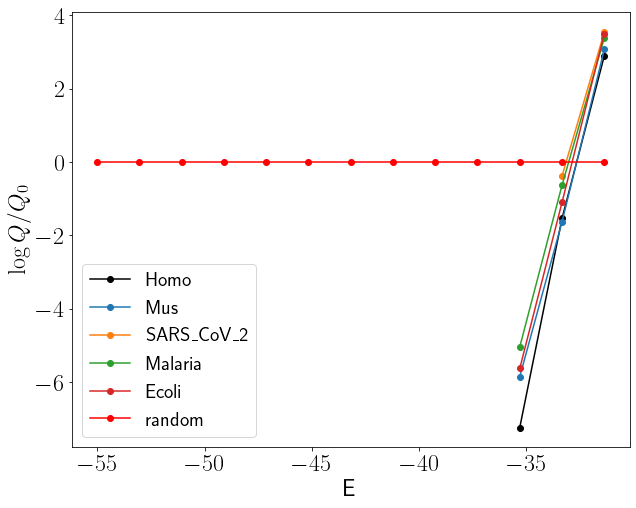

In [39]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot((data[1][:-1]), np.log(data[0][0]/data[0][-1]), linestyle = '-', marker = 'o', label = 'Homo', color = 'black')
ax.plot((data[1][:-1]), np.log(data[0][1]/data[0][-1]), linestyle = '-', marker = 'o', label = 'Mus')
#ax.plot((data[1][:-1]), np.log(data[0][2]/data[0][-1]), linestyle = '-', marker = 'o', label = 'Influenza A')
ax.plot((data[1][:-1]), np.log(data[0][3]/data[0][-1]), linestyle = '-', marker = 'o', label = 'SARS_CoV_2')
ax.plot((data[1][:-1]), np.log(data[0][4]/data[0][-1]), linestyle = '-', marker = 'o', label = 'Malaria')
ax.plot((data[1][:-1]), np.log(data[0][5]/data[0][-1]), linestyle = '-', marker = 'o', label = 'Ecoli')
#ax.plot((data[1][:-1]), np.log(data[0][6]/data[0][-1]), linestyle = '-', marker = 'o', label = 'HIV')
ax.plot((data[1][:-1]), np.log(data[0][-1]/data[0][-1]), linestyle = '-', marker = 'o', label = 'random', color = 'red')
ax.legend(fontsize = 20);
my_plot_layout(ax=ax, ylabel = r'$\log{Q/Q_0}$', xlabel = r'E')
fig.savefig('../Figures/8_Antigenicity/first_signature2_5.pdf')


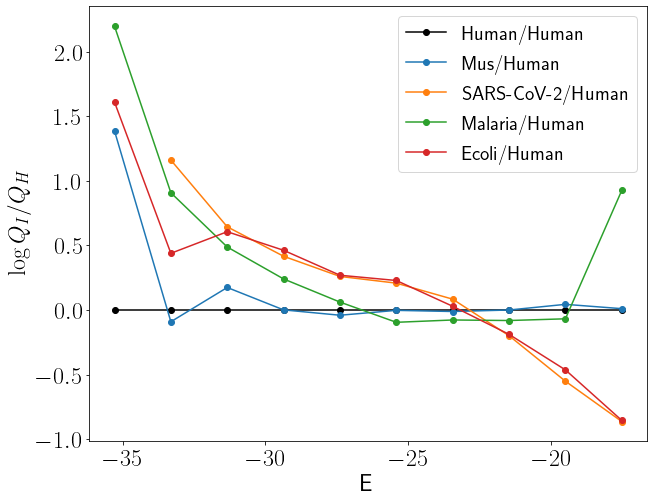

In [40]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot((data[1][:-1]), np.log(data[0][0]/data[0][0]), linestyle = '-', marker = 'o', label = 'Human/Human',color='black')
ax.plot((data[1][:-1]), np.log(data[0][1]/data[0][0]), linestyle = '-', marker = 'o', label = 'Mus/Human')
#ax.plot((data[1][:-1]), np.log(data[0][2]/data[0][0]), linestyle = '-', marker = 'o', label = 'Influenza A/Human')
ax.plot((data[1][:-1]), np.log(data[0][3]/data[0][0]), linestyle = '-', marker = 'o', label = 'SARS-CoV-2/Human')
ax.plot((data[1][:-1]), np.log(data[0][4]/data[0][0]), linestyle = '-', marker = 'o', label = 'Malaria/Human')
ax.plot((data[1][:-1]), np.log(data[0][5]/data[0][0]), linestyle = '-', marker = 'o', label = 'Ecoli/Human')
#ax.plot((data[1][:-1]), np.log(data[0][6]/data[0][0]), linestyle = '-', marker = 'o', label = 'HIV/Human')
ax.legend(fontsize = 20);
my_plot_layout(ax=ax, ylabel = r'$\log{Q_I/Q_H}$', xlabel = r'E')
fig.savefig('../Figures/8_Antigenicity/first_signature3_5.pdf')


In [54]:
A = np.array([1, 2, 4, 2])
R = len(A)
positions = np.random.random((R, 2))
radious = np.random.random(R)*.1

[0.31841849 0.00437075]
[0.32191407 0.94901863]
[0.78402566 0.78869417]
[0.85931511 0.20463729]


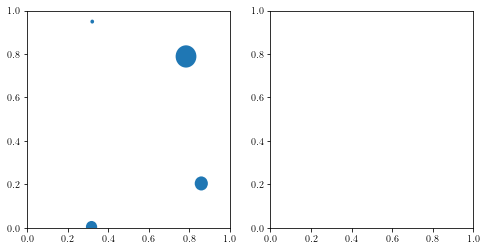

In [57]:
fig, ax = plt.subplots(1, 2,figsize=(8,4))
for i in range(R):  
    print(positions[i])
    c = plt.Circle(positions[i], radious[i])#, alpha = A[i]/sum(A))
    ax[0].add_patch(c)

In [59]:
t = 88+121+1
a = 88/t
b = 121/t
c = 1/t
d = a*1 + b*2 + c*3
print(d, a+b+c)

1.5857142857142856 1.0
